In [1]:
import stlearn as st

D:\Anaconda3\envs\stlearn\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [19]:
data = st.read.file_table(filename="C:/Users/duy/UQ/ST_BrainInjuryModel/JVQN_Brain_6_S6_stdata.tsv")
data = st.add.parsing(data,coordinates_file = "C:/Users/duy/UQ/ST_BrainInjuryModel/Preprocessed/Brain6_extracted_full.tsv")
st.add.image(adata=data, imgpath="C:/Users/duy/UQ/ST_BrainInjuryModel/ClearBackground/Brain6.jpg")

Added tissue image to the object!


In [20]:
#import mygene
#mg = mygene.MyGeneInfo()
#gene_symbol = mg.querymany(list(data.var.index), scopes='ensembl.gene',returnall=False)

#query = []
#result = []

#for i in range(0,len(gene_symbol)):
#    query.append(gene_symbol[i]["query"])
#    try:
#        result.append(gene_symbol[i]["symbol"])
#    except:
#        result.append("Unknown")
#gene_dictionary = dict(zip(query,result))
#new_symbol = []
#for gene in known_gene:
#    new_symbol.append(gene_dictionary[gene])
#data.var.index = new_symbol
#import numpy as np
#np.savetxt("gene_var_brain6.txt",np.array(new_symbol),fmt='%s')

In [21]:
known_gene = [name for name in data.var_names if not name.startswith('__ambiguous')]
data = data[:,known_gene]
# If I get gene list
with open('../stlearn_analysis/gene_var_brain6.txt', 'r') as f:
    gene_var = f.read().split('\n')
data.var.index = gene_var[:-1]

In [22]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)
#st.em.run_pca(data,n_comps=50)
#st.pp.neighbors(data,n_neighbors=15)
#st.em.run_umap(data)

#st.pp.neighbors(data,n_neighbors=20,use_rep='X_umap')
#st.tl.clustering.louvain(data)

filtered out 5661 genes that are detected in less than 3 cells


Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [23]:
data.var_names_make_unique()
non_mito = [name for name in data.var_names if not name.startswith('mt-')]
data = data[:,non_mito]

In [27]:
st.tl.clustering.kmeans(data,n_clusters=6,use_data="X_pca")

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


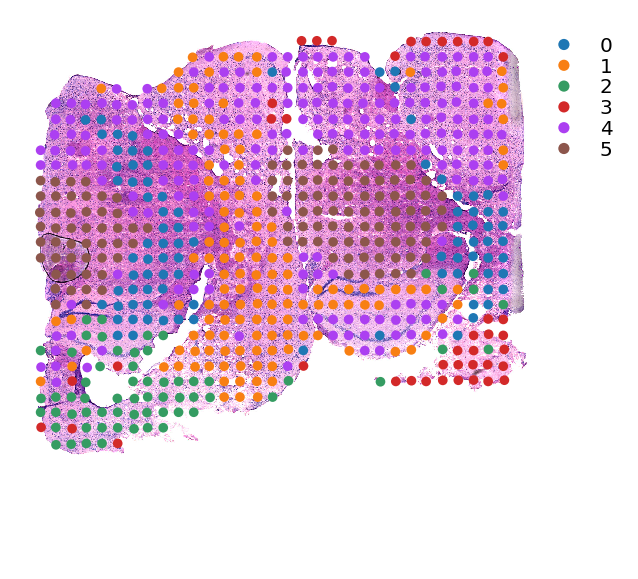

In [28]:
st.pl.cluster_plot(data,use_label="kmeans",spot_size=15)

In [29]:
st.pp.neighbors(data,use_rep="X_pca",n_neighbors=25)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [30]:
st.spatial.trajectory.global_level(data,use_labels="kmeans",eps=100,morphology=False,pseudo_root=0)

PAGA plot:


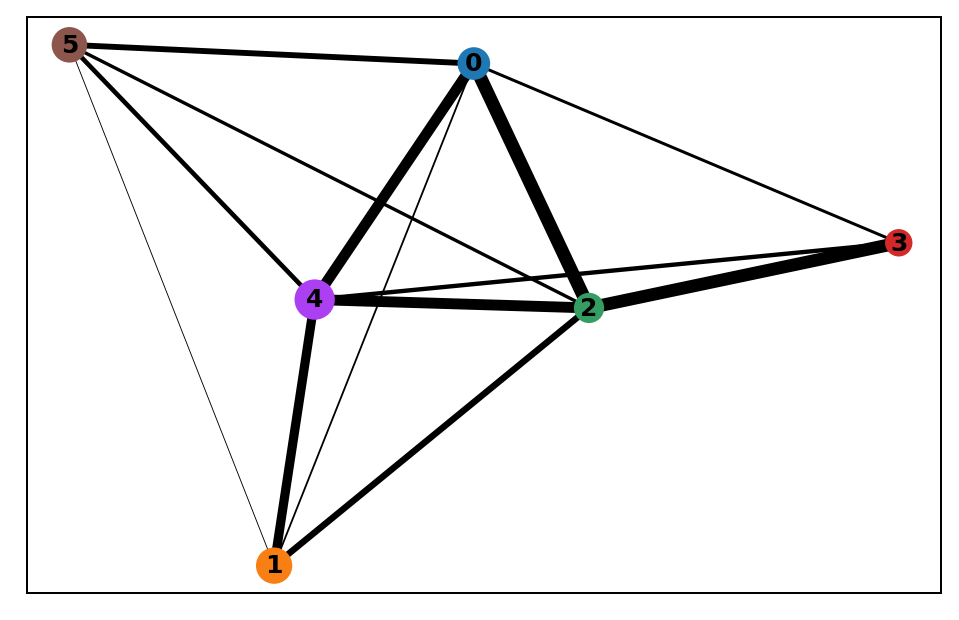

Gene expression (reduced dimension) plot:


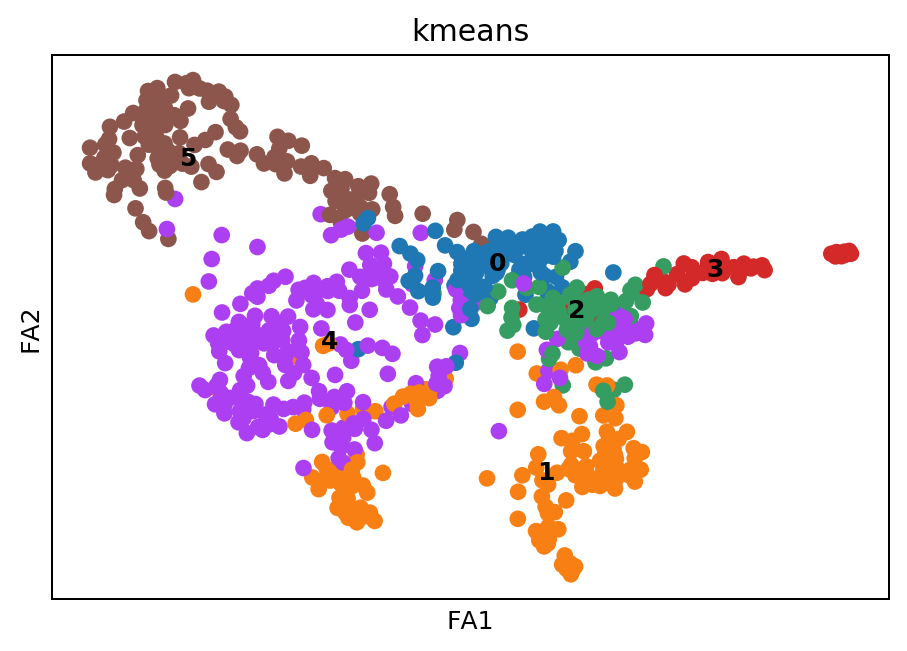

Diffusion pseudotime plot:


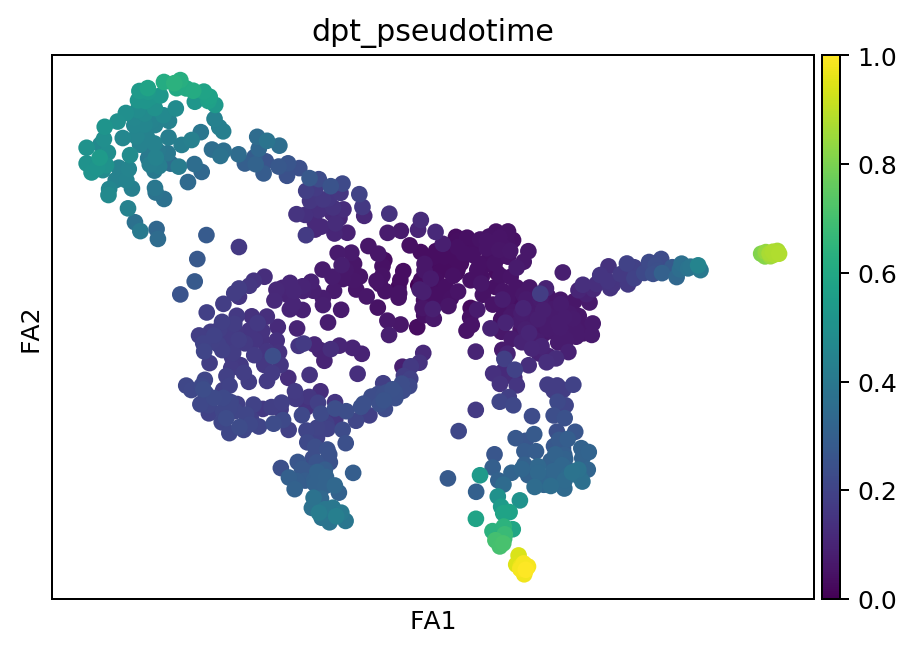

In [31]:
st.pl.non_spatial_plot(data,use_label="kmeans")

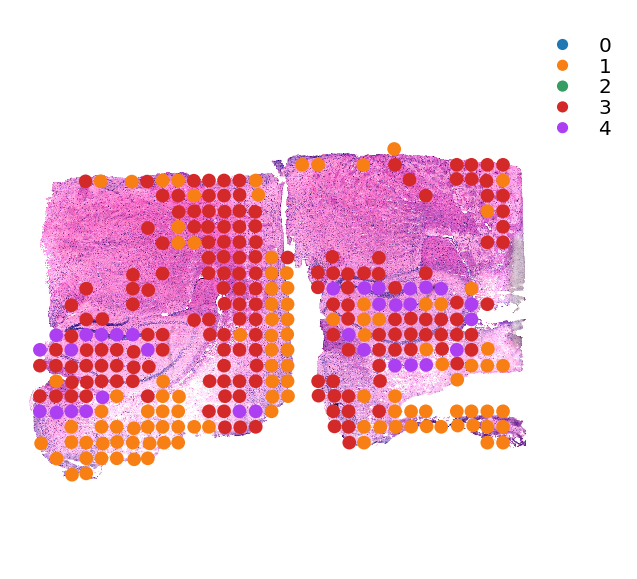

In [18]:
st.pl.cluster_plot(data,use_label="kmeans",list_cluster=[4,3,1],spot_size=30)

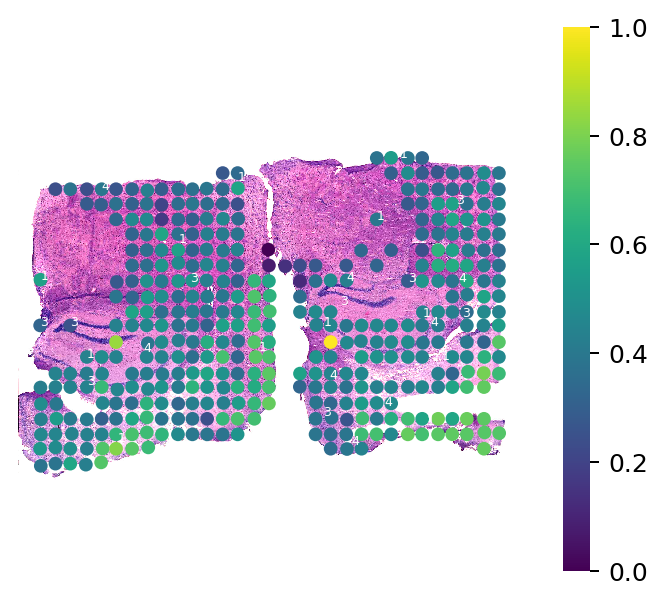

In [56]:
st.pl.trajectory.global_plot(data,use_label="kmeans",list_cluster=[4,3,1],edge_alpha=0.0,spot_size=30,node_alpha=0.0,show_graph=True)

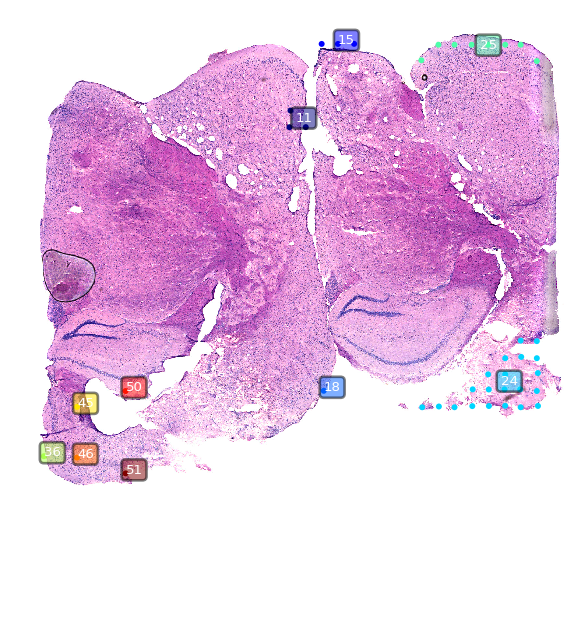

In [32]:
st.pl.subcluster_plot(data,use_label="kmeans",cluster=3)

In [32]:
import scanpy as sc
sc.tl.rank_genes_groups(data,"kmeans")

/home/d.pham/anaconda3/envs/stlearn/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


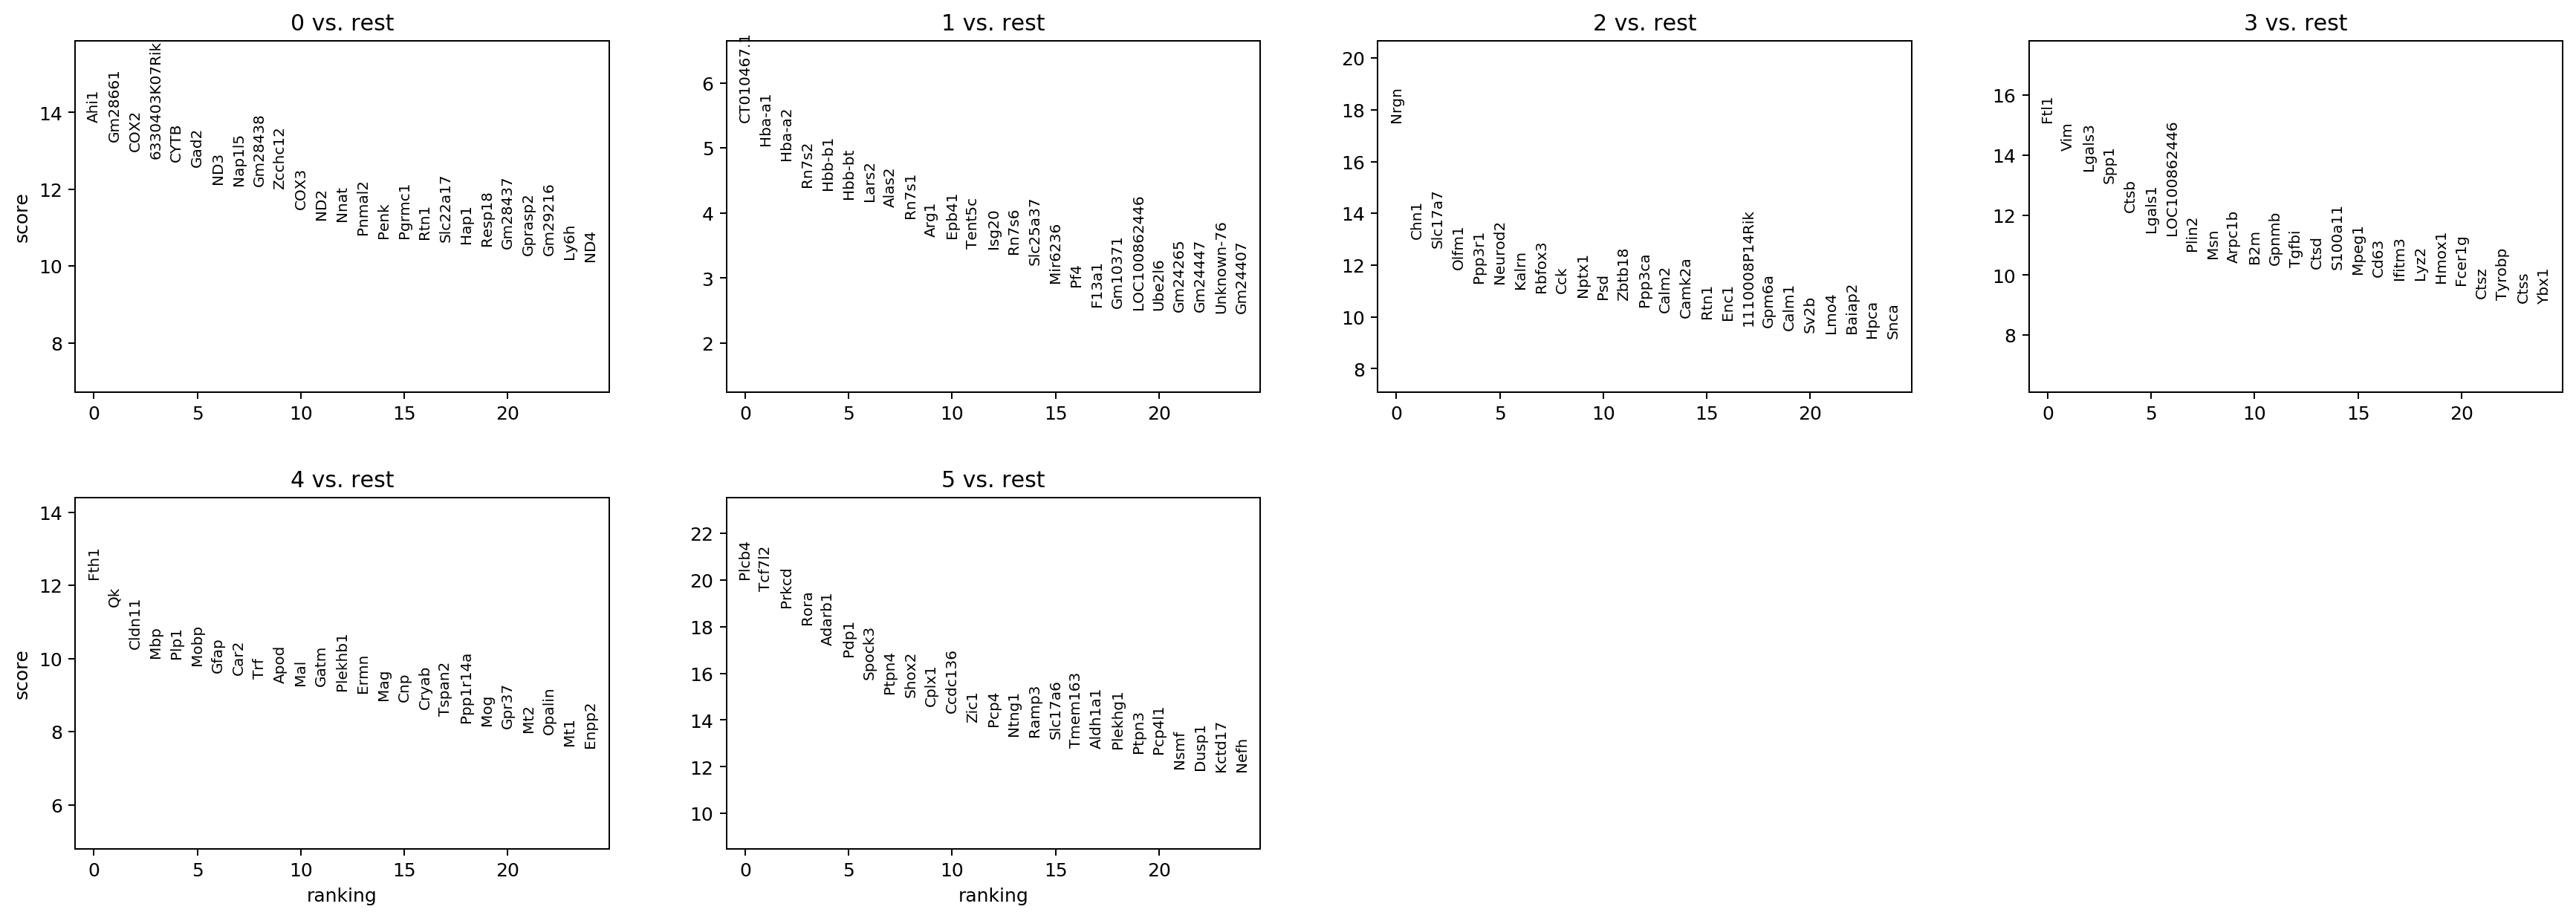

In [17]:
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False)

In [18]:
sc.tl.dendrogram(data,groupby="kmeans")

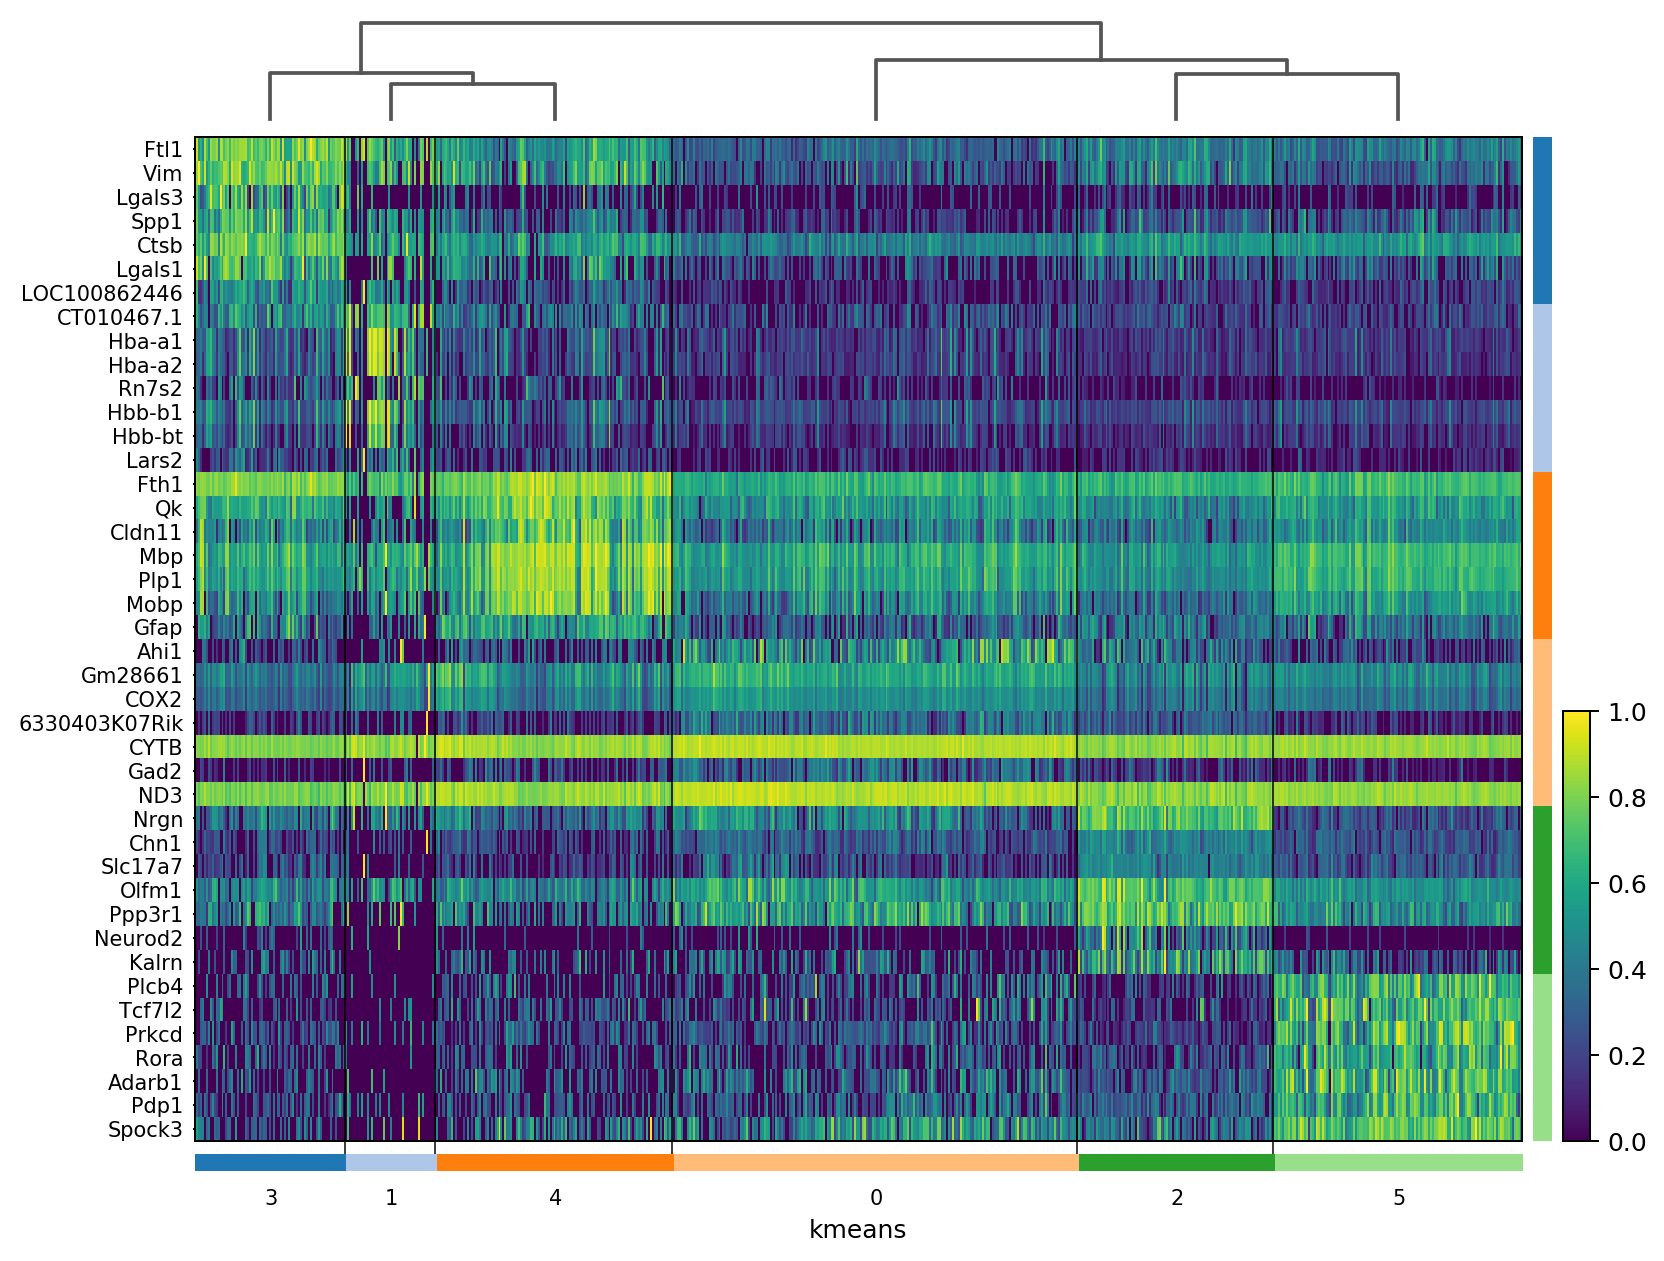

In [20]:
import scanpy
scanpy.pl.rank_genes_groups_heatmap(data,  n_genes=7,standard_scale='var', swap_axes=True)

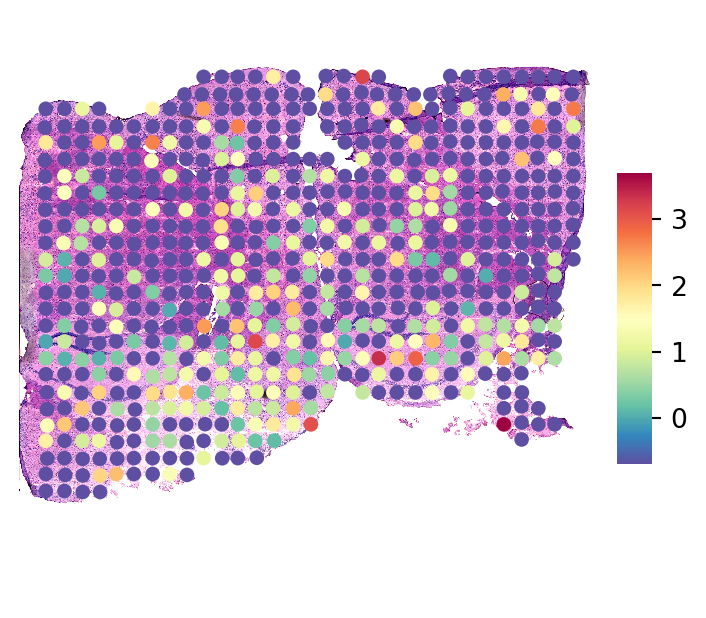

In [35]:
st.pl.gene_plot(data,genes="Chn1",spot_size=30)

ICA is done! Generated in adata.obsm['X_ica'] and parameters in adata.uns['ica']


In [4]:
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import matplotlib
import numpy as np

from stlearn._compat import Literal
from typing import Optional, Union
from anndata import AnnData
import warnings
import numpy as np
import io
from PIL import Image
import matplotlib


def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    from io import BytesIO

    fig.savefig(buf, format="png", dpi=dpi, bbox_inches='tight',
                pad_inches=0, transparent=True)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    img = np.asarray(Image.open(BytesIO(img_arr)))
    buf.close()
    #img = cv2.imdecode(img_arr, 1)
    #img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

    return img


def microenv_plot(
    adata: AnnData,
    name: str = None,
    use_data: str = None,
    data_alpha: float = 1.0,
    tissue_alpha: float = 1.0,
    cmap: str = "Spectral_r",
    title: str = None,
    x_label: str = None,
    y_label: str = None,
    spot_size: Union[float, int] = 6.5,
    show_color_bar: bool = True,
    show_axis: bool = False,
    dpi: int = 192,
    output: str = None,
    copy: bool = False,
) -> Optional[AnnData]:

    colors = _microenv_plot(adata, use_data)

    n_factor = len(colors)
    plt.ioff()

    if "plots" not in adata.uns:
        adata.uns['plots'] = {}

    adata.uns['plots'].update({use_data: {}})

    for i in range(0, n_factor):
        fig, a = plt.subplots()
        vmin = min(colors[i])
        vmax = max(colors[i])
        sc = a.scatter(adata.obs["imagecol"], adata.obs["imagerow"], edgecolor="none", alpha=data_alpha, s=spot_size, marker="s",
                       vmin=vmin, vmax=vmax, cmap=plt.get_cmap(cmap), c=colors[i])

        if show_color_bar:
            cb = plt.colorbar(sc, cax=fig.add_axes([0.78, 0.3, 0.03, 0.38]))
            cb.outline.set_visible(False)
        if not show_axis:
            a.axis('off')

        # Overlay the tissue image
        a.imshow(adata.uns["tissue_img"], alpha=tissue_alpha, zorder=-1,)

        if output is not None:
            fig.savefig(output + "/factor_" + str(i+1) + ".png",
                        dpi=dpi, bbox_inches='tight', pad_inches=0)

        fig_np = get_img_from_fig(fig, dpi)

        plt.close(fig)

        current_plot = {"factor_"+str(i+1): fig_np}

        adata.uns['plots'][use_data].update(current_plot)

    print("The plot stored in adata.uns['plots']['" + use_data + "']")


def _microenv_plot(adata, use_data):

    n_factor = adata.obsm[use_data].shape[1]
    l_colors = []
    for i in range(0, n_factor):
        colors = adata.obsm[use_data][:, i]
        vmin = min(colors)
        vmax = max(colors)
        l_colors.append(colors)

    return l_colors


In [24]:
st.em.run_fa(data,n_factors=20)

FA is done! Generated in adata.obsm["X_fa"]


In [31]:
microenv_plot(data,use_data="X_fa",dpi=192,spot_size=50,cmap="plasma",data_alpha=0.8,)

The plot stored in adata.uns['plots']['X_fa']


In [206]:
st.view.microenv_plot(data,use_data="X_fa")

In [196]:
from scipy.stats import spearmanr
import numpy as np
def get_rank_cor(adata):
    tmp = adata.to_df()
    dpt = adata.obsm["X_fa"][:,0]
    genes = []
    score = []
    for gene in list(adata.var.index):
        genes.append(gene)
        score.append(spearmanr(tmp[gene].values,dpt)[0])
    import pandas as pd
    final = pd.DataFrame(
    {'gene': genes,
     'score': score,
    })
    return final




In [197]:
result = get_rank_cor(data)

In [207]:
top100 = list(result.sort_values("score",ascending=False)["gene"].values[:250])

In [208]:
import gseapy
test = gseapy.enrichr(top100,gene_sets="Mouse_Gene_Atlas")

In [216]:
factor_3 = test.results[test.results["Adjusted P-value"]<0.05]

In [223]:
factor_3

,Adjusted P-value,Combined Score,Gene_set,Genes,Odds Ratio,Old Adjusted P-value,Old P-value,Overlap,P-value,Term
1,0.039479,28.955639,Mouse_Gene_Atlas,CAR2;CD24A;GYPA;ALAS2;HMGB2;PPBP;TRIM10;S100A9,4.076433,0,0,8/157,0.000822,bone
2,0.029808,37.219879,Mouse_Gene_Atlas,C1QB;C1QA;ZEB2;PRDX1;CTSC;MS4A6D,5.333333,0,0,6/90,0.000931,microglia
3,0.040889,17.337001,Mouse_Gene_Atlas,ANXA1;GPNMB;NPC2;RPS6;PLIN2;CYBA;CD68;LITAF;CT...,2.719547,0,0,12/353,0.001704,macrophage peri LPS thio 0hrs


In [232]:
list(p_value)

[1.4036306984155806, 1.5256727637331216, 1.3883985428143752]

In [218]:
factor_3 = factor_3

In [248]:
y_pos

array([0, 1, 2])

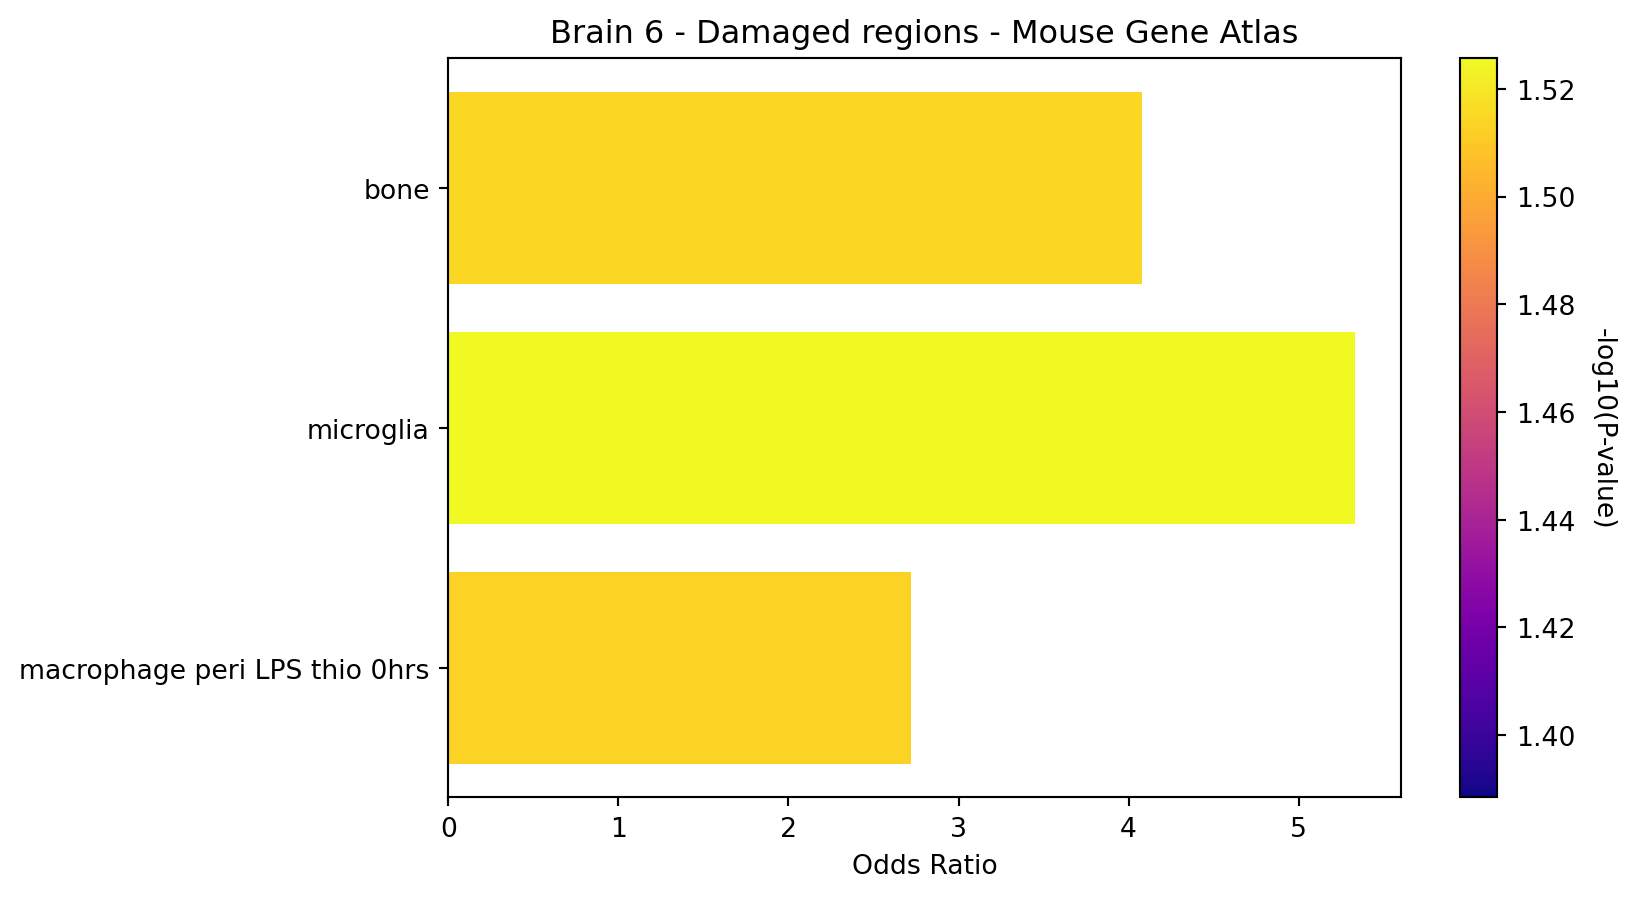

In [258]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import numpy as np
from pylab import rcParams
plt.rcParams['figure.figsize'] = 8, 5

# Fixing random state for reproducibility
np.random.seed(19680801)



# Example data
people = factor_3["Term"]
y_pos = np.arange(len(people))
performance = factor_3["Odds Ratio"]

p_value = -np.log10(factor_3["Adjusted P-value"])
colors = cm.plasma(p_value / float(max(p_value)))
plot = ax.scatter(people, performance, c = p_value, cmap = 'plasma')

fig, ax = plt.subplots()

ax.barh(range(len(performance)),performance, color = colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Odds Ratio')
ax.set_title('Brain 6 - Damaged regions - Mouse Gene Atlas')

cbar = fig.colorbar(plot)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('-log10(P-value)', rotation=270)

plt.show()

In [255]:
p_value

1    1.403631
2    1.525673
3    1.388399
Name: Adjusted P-value, dtype: float64